In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoMinorLocator
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [2]:
blue = ["#4194d8"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [3]:
Pq_file = h5py.File("../data/processed_data/GS_Pn_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq2_file = h5py.File("../data/processed_data/GS_Pn2_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")

# |U| = 1
Pn_Um1 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][0, :]['re_'], Pq_file['Pn_err'][0, :]['re_'])]
Pn_Um1_avg = [yi.n for yi in Pn_Um1]
Pn_Um1_err = [yi.s for yi in Pn_Um1]

Pn2_Um1 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][0, :]['re_'], Pq2_file['Pn2_err'][0, :]['re_'])]
Pn2_Um1_avg = [yi.n for yi in Pn2_Um1]
Pn2_Um1_err = [yi.s for yi in Pn2_Um1]

Pm_Um1 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][0, :]['re_'], Pq_file['Pm_err'][0, :]['re_'])]
Pm_Um1_avg = [yi.n for yi in Pm_Um1]
Pm_Um1_err = [yi.s for yi in Pm_Um1]

Pm2_Um1 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][0, :]['re_'], Pq2_file['Pm2_err'][0, :]['re_'])]
Pm2_Um1_avg = [yi.n for yi in Pm2_Um1]
Pm2_Um1_err = [yi.s for yi in Pm2_Um1]

# |U| = 4
Pn_Um4 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][3, :]['re_'], Pq_file['Pn_err'][3, :]['re_'])]
Pn_Um4_avg = [yi.n for yi in Pn_Um4]
Pn_Um4_err = [yi.s for yi in Pn_Um4]

Pm_Um4 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][3, :]['re_'], Pq_file['Pm_err'][3, :]['re_'])]
Pm_Um4_avg = [yi.n for yi in Pm_Um4]
Pm_Um4_err = [yi.s for yi in Pm_Um4]

Pm2_Um4 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][3, :]['re_'], Pq2_file['Pm2_err'][3, :]['re_'])]
Pm2_Um4_avg = [yi.n for yi in Pm2_Um4]
Pm2_Um4_err = [yi.s for yi in Pm2_Um4]

Pn2_Um4 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][3, :]['re_'], Pq2_file['Pn2_err'][3, :]['re_'])]
Pn2_Um4_avg = [yi.n for yi in Pn2_Um4]
Pn2_Um4_err = [yi.s for yi in Pn2_Um4]

# |U| = 8
Pn_Um8 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][5, :]['re_'], Pq_file['Pn_err'][5, :]['re_'])]
Pn_Um8_avg = [yi.n for yi in Pn_Um8]
Pn_Um8_err = [yi.s for yi in Pn_Um8]

Pn2_Um8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][5, :]['re_'], Pq2_file['Pn2_err'][5, :]['re_'])]
Pn2_Um8_avg = [yi.n for yi in Pn2_Um8]
Pn2_Um8_err = [yi.s for yi in Pn2_Um8]

Pm_Um8 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][5, :]['re_'], Pq_file['Pm_err'][5, :]['re_'])]
Pm_Um8_avg = [yi.n for yi in Pm_Um8]
Pm_Um8_err = [yi.s for yi in Pm_Um8]

Pm2_Um8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][5, :]['re_'], Pq2_file['Pm2_err'][5, :]['re_'])]
Pm2_Um8_avg = [yi.n for yi in Pm2_Um8]
Pm2_Um8_err = [yi.s for yi in Pm2_Um8]

Text(4, 0.15, '$|U|=8.0$')

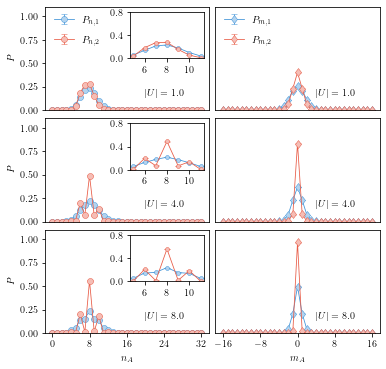

In [4]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(3, 2, hspace=0.08, wspace=0.04)
axn_1 = fig.add_subplot(gs[0])
axm_1 = fig.add_subplot(gs[1])
axn_4 = fig.add_subplot(gs[2])
axm_4 = fig.add_subplot(gs[3])
axn_8 = fig.add_subplot(gs[4])
axm_8 = fig.add_subplot(gs[5])

axn_1.set_xticks([])
axn_1.set_ylim([0,1.1])
axn_1.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axn_1.errorbar(
    range(33), Pn_Um1_avg[::-1] , yerr=Pn_Um1_err[::-1], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axn_1.errorbar(
    range(33), Pn2_Um1_avg[::-1] , yerr=Pn2_Um1_err[::-1], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axins1 = inset_axes(axn_1, width='45%', height='45%', loc='upper right')
#axins1.set_xlabel(r"$n_A$")
axins1.set_xticks([6,8,10])
axins1.set_ylim([0,0.8])
axins1.set_yticks([0.0, 0.4, 0.8])
axins1.errorbar(
    range(5,12), Pn_Um1_avg[::-1][5:12] , yerr=Pn_Um1_err[::-1][5:12], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axins1.errorbar(
    range(5,12), Pn2_Um1_avg[::-1][5:12] , yerr=Pn2_Um1_err[::-1][5:12], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axn_1.legend(frameon=False, ncol=1, loc='upper left', labelspacing=1.0)

axm_1.set_ylim([0,1.1])
axm_1.set_xticks([])
axm_1.set_yticks([])
axm_1.errorbar(
    range(-16,17), Pm_Um1_avg , yerr=Pm_Um1_err, 
    label=r'$P_{m,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axm_1.errorbar(
    range(-16,17), Pm2_Um1_avg , yerr=Pm2_Um1_err, 
    label=r'$P_{m,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axm_1.legend(frameon=False, ncol=1, loc='upper left', labelspacing=1.0)

axn_4.set_ylim([0,1.1])
axn_4.set_xticks([])
axn_4.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axn_4.errorbar(
    range(33), Pn_Um4_avg[::-1] , yerr=Pn_Um4_err[::-1], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axn_4.errorbar(
    range(33), Pn2_Um4_avg[::-1] , yerr=Pn2_Um4_err[::-1], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axins2 = inset_axes(axn_4, width='45%', height='45%', loc='upper right')
axins2.set_xticks([6,8,10])
axins2.set_ylim([0,0.8])
axins2.set_yticks([0.0, 0.4, 0.8])
axins2.errorbar(
    range(5,12), Pn_Um4_avg[::-1][5:12] , yerr=Pn_Um4_err[::-1][5:12], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axins2.errorbar(
    range(5,12), Pn2_Um4_avg[::-1][5:12] , yerr=Pn2_Um4_err[::-1][5:12], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axm_4.set_ylim([0,1.1])
axm_4.set_xticks([])
axm_4.set_yticks([])
axm_4.errorbar(
    range(-16,17), Pm_Um4_avg , yerr=Pm_Um4_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axm_4.errorbar(
    range(-16,17), Pm2_Um4_avg , yerr=Pm2_Um4_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axn_8.set_xlabel(r'$n_A$')
axn_8.set_xticks([0, 8, 16, 24, 32])
axn_8.set_ylim([0,1.1])
axn_8.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axn_8.errorbar(
    range(33), Pn_Um8_avg[::-1] , yerr=Pn_Um8_err[::-1], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axn_8.errorbar(
    range(33), Pn2_Um8_avg[::-1] , yerr=Pn2_Um8_err[::-1], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axins3 = inset_axes(axn_8, width='45%', height='45%', loc='upper right')
axins3.set_xticks([6,8,10])
axins3.set_ylim([0,0.8])
axins3.set_yticks([0.0, 0.4, 0.8])
axins3.errorbar(
    range(5,12), Pn_Um8_avg[::-1][5:12] , yerr=Pn_Um8_err[::-1][5:12], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axins3.errorbar(
    range(5,12), Pn2_Um8_avg[::-1][5:12] , yerr=Pn2_Um8_err[::-1][5:12], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axm_8.set_ylim([0,1.1])
axm_8.set_xlabel(r'$m_A$')
axm_8.set_xticks([-16, -8, 0, 8, 16])
axm_8.set_yticks([])
axm_8.errorbar(
    range(-16,17), Pm_Um8_avg , yerr=Pm_Um8_err, 
    label=r'$P_{m,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axm_8.errorbar(
    range(-16,17), Pm2_Um8_avg , yerr=Pm2_Um8_err, 
    label=r'$P_{m,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axn_1.set_ylabel(r'$P$')
axn_4.set_ylabel(r'$P$')
axn_8.set_ylabel(r'$P$')

axn_1.annotate(r'$|U|=1.0$', (20, 0.15))
axn_4.annotate(r'$|U|=4.0$', (20, 0.15))
axn_8.annotate(r'$|U|=8.0$', (20, 0.15))

axm_1.annotate(r'$|U|=1.0$', (4, 0.15))
axm_4.annotate(r'$|U|=4.0$', (4, 0.15))
axm_8.annotate(r'$|U|=8.0$', (4, 0.15))

In [5]:
fig.savefig("../figures/Pq_resolved_quartfill_Lx8Ly8.pdf")
fig.savefig("../figures/Pq_resolved_quartfill_Lx8Ly8.svg")

In [6]:
Pq_file = h5py.File("../data/processed_data/GS_Pn_N64_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")
Pq2_file = h5py.File("../data/processed_data/GS_Pn2_N64_Lx8_Ly8_LA16_beta18.0_L180.jld", "r")

# |U| = 1
Pn_Um1 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][0, :]['re_'], Pq_file['Pn_err'][0, :]['re_'])]
Pn_Um1_avg = [yi.n for yi in Pn_Um1]
Pn_Um1_err = [yi.s for yi in Pn_Um1]

Pn2_Um1 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][0, :]['re_'], Pq2_file['Pn2_err'][0, :]['re_'])]
Pn2_Um1_avg = [yi.n for yi in Pn2_Um1]
Pn2_Um1_err = [yi.s for yi in Pn2_Um1]

Pm_Um1 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][0, :]['re_'], Pq_file['Pm_err'][0, :]['re_'])]
Pm_Um1_avg = [yi.n for yi in Pm_Um1]
Pm_Um1_err = [yi.s for yi in Pm_Um1]

Pm2_Um1 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][0, :]['re_'], Pq2_file['Pm2_err'][0, :]['re_'])]
Pm2_Um1_avg = [yi.n for yi in Pm2_Um1]
Pm2_Um1_err = [yi.s for yi in Pm2_Um1]

# |U| = 4
Pn_Um4 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][2, :]['re_'], Pq_file['Pn_err'][2, :]['re_'])]
Pn_Um4_avg = [yi.n for yi in Pn_Um4]
Pn_Um4_err = [yi.s for yi in Pn_Um4]

Pm_Um4 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][2, :]['re_'], Pq_file['Pm_err'][2, :]['re_'])]
Pm_Um4_avg = [yi.n for yi in Pm_Um4]
Pm_Um4_err = [yi.s for yi in Pm_Um4]

Pm2_Um4 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][3, :]['re_'], Pq2_file['Pm2_err'][3, :]['re_'])]
Pm2_Um4_avg = [yi.n for yi in Pm2_Um4]
Pm2_Um4_err = [yi.s for yi in Pm2_Um4]

Pn2_Um4 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][3, :]['re_'], Pq2_file['Pn2_err'][3, :]['re_'])]
Pn2_Um4_avg = [yi.n for yi in Pn2_Um4]
Pn2_Um4_err = [yi.s for yi in Pn2_Um4]

# |U| = 8
Pn_Um8 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][-1, :]['re_'], Pq_file['Pn_err'][-1, :]['re_'])]
Pn_Um8_avg = [yi.n for yi in Pn_Um8]
Pn_Um8_err = [yi.s for yi in Pn_Um8]

Pn2_Um8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][-1, :]['re_'], Pq2_file['Pn2_err'][-1, :]['re_'])]
Pn2_Um8_avg = [yi.n for yi in Pn2_Um8]
Pn2_Um8_err = [yi.s for yi in Pn2_Um8]

Pm_Um8 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][-1, :]['re_'], Pq_file['Pm_err'][-1, :]['re_'])]
Pm_Um8_avg = [yi.n for yi in Pm_Um8]
Pm_Um8_err = [yi.s for yi in Pm_Um8]

Pm2_Um8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][-1, :]['re_'], Pq2_file['Pm2_err'][-1, :]['re_'])]
Pm2_Um8_avg = [yi.n for yi in Pm2_Um8]
Pm2_Um8_err = [yi.s for yi in Pm2_Um8]

Text(4, 0.15, '$|U|=8.0$')

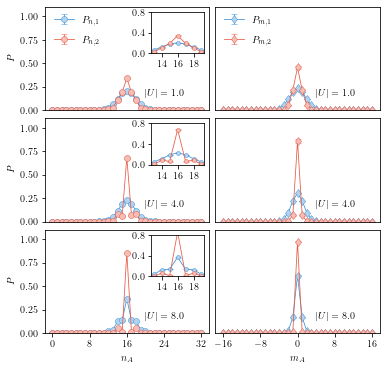

In [8]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(3, 2, hspace=0.08, wspace=0.04)
axn_1 = fig.add_subplot(gs[0])
axm_1 = fig.add_subplot(gs[1])
axn_4 = fig.add_subplot(gs[2])
axm_4 = fig.add_subplot(gs[3])
axn_8 = fig.add_subplot(gs[4])
axm_8 = fig.add_subplot(gs[5])

axn_1.set_xticks([])
axn_1.set_ylim([0,1.1])
axn_1.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axn_1.errorbar(
    range(33), Pn_Um1_avg, yerr=Pn_Um1_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axn_1.errorbar(
    range(33), Pn2_Um1_avg , yerr=Pn2_Um1_err, 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axins1 = inset_axes(axn_1, width='32%', height='40%', loc='upper right')
#axins1.set_xlabel(r"$n_A$")
axins1.set_xticks([14,16,18])
axins1.set_ylim([0,0.8])
axins1.set_yticks([0.0, 0.4, 0.8])
axins1.errorbar(
    range(13,20), Pn_Um1_avg[13:20] , yerr=Pn_Um1_err[13:20], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axins1.errorbar(
    range(13,20), Pn2_Um1_avg[13:20] , yerr=Pn2_Um1_err[13:20], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axn_1.legend(frameon=False, ncol=1, loc='upper left', labelspacing=1.0)

axm_1.set_ylim([0,1.1])
axm_1.set_xticks([])
axm_1.set_yticks([])
axm_1.errorbar(
    range(-16,17), Pm_Um1_avg , yerr=Pm_Um1_err, 
    label=r'$P_{m,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axm_1.errorbar(
    range(-16,17), Pm2_Um1_avg , yerr=Pm2_Um1_err, 
    label=r'$P_{m,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axm_1.legend(frameon=False, ncol=1, loc='upper left', labelspacing=1.0)

axn_4.set_ylim([0,1.1])
axn_4.set_xticks([])
axn_4.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axn_4.errorbar(
    range(33), Pn_Um4_avg, yerr=Pn_Um4_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axn_4.errorbar(
    range(33), Pn2_Um4_avg , yerr=Pn2_Um4_err, 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axins2 = inset_axes(axn_4, width='32%', height='40%', loc='upper right')
axins2.set_xticks([14,16,18])
axins2.set_ylim([0,0.8])
axins2.set_yticks([0.0, 0.4, 0.8])
axins2.errorbar(
    range(13,20), Pn_Um4_avg[13:20] , yerr=Pn_Um4_err[13:20], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axins2.errorbar(
    range(13,20), Pn2_Um4_avg[13:20] , yerr=Pn2_Um4_err[13:20], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axm_4.set_ylim([0,1.1])
axm_4.set_xticks([])
axm_4.set_yticks([])
axm_4.errorbar(
    range(-16,17), Pm_Um4_avg , yerr=Pm_Um4_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axm_4.errorbar(
    range(-16,17), Pm2_Um4_avg , yerr=Pm2_Um4_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axn_8.set_xlabel(r'$n_A$')
axn_8.set_xticks([0, 8, 16, 24, 32])
axn_8.set_ylim([0,1.1])
axn_8.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axn_8.errorbar(
    range(33), Pn_Um8_avg , yerr=Pn_Um8_err, 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axn_8.errorbar(
    range(33), Pn2_Um8_avg[::-1] , yerr=Pn2_Um8_err[::-1], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axins3 = inset_axes(axn_8, width='32%', height='40%', loc='upper right')
axins3.set_xticks([14,16,18])
axins3.set_ylim([0,0.8])
axins3.set_yticks([0.0, 0.4, 0.8])
axins3.errorbar(
    range(13,20), Pn_Um8_avg[13:20] , yerr=Pn_Um8_err[13:20], 
    label=r'$P_{n,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)
axins3.errorbar(
    range(13,20), Pn2_Um8_avg[13:20] , yerr=Pn2_Um8_err[13:20], 
    label=r'$P_{n,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=4, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axm_8.set_ylim([0,1.1])
axm_8.set_xlabel(r'$m_A$')
axm_8.set_xticks([-16, -8, 0, 8, 16])
axm_8.set_yticks([])
axm_8.errorbar(
    range(-16,17), Pm_Um8_avg , yerr=Pm_Um8_err, 
    label=r'$P_{m,1}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[4], markeredgewidth=0.5
)

axm_8.errorbar(
    range(-16,17), Pm2_Um8_avg , yerr=Pm2_Um8_err, 
    label=r'$P_{m,2}$', 
    linewidth=0.8, elinewidth=0.8,
    fmt='-d', markersize=6, capsize=3, capthick=1,
    color=red[0],
    markerfacecolor=red[4], markeredgewidth=0.5
)

axn_1.set_ylabel(r'$P$')
axn_4.set_ylabel(r'$P$')
axn_8.set_ylabel(r'$P$')

axn_1.annotate(r'$|U|=1.0$', (20, 0.15))
axn_4.annotate(r'$|U|=4.0$', (20, 0.15))
axn_8.annotate(r'$|U|=8.0$', (20, 0.15))

axm_1.annotate(r'$|U|=1.0$', (4, 0.15))
axm_4.annotate(r'$|U|=4.0$', (4, 0.15))
axm_8.annotate(r'$|U|=8.0$', (4, 0.15))

In [9]:
fig.savefig("../figures/Pq_resolved_halffill_Lx8Ly8.pdf")
fig.savefig("../figures/Pq_resolved_halffill_Lx8Ly8.svg")